# HRV Parameter Extraction
This notebook is used for extracting HRV parameters from the peaks extracted in step 3.

To do:
- Calculate R-R intervals (done)
- Plot Frequency domain for HRV values (done)
- Extract SDNN (done)
- Extract pNN50 (done)
- Extract RMSSD (done)
- Extract Frequency domain parameters (done)
- Save these values in the folder associated with the patient (done)

## Initial setup

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather
from tqdm import tqdm

In [2]:
%run "4.0-HRV_Extraction_Function.ipynb"

In [3]:
root = 'G:\My Drive\Molecool\Databases\Database1'
#root = 'G:\.shortcut-targets-by-id\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\Molecool\Databases\Database1'
#root = '/Volumes/GoogleDrive/.shortcut-targets-by-id/1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD/Molecool/Databases/Database1'

### Function definitions

In [4]:
def _check_valid(path):
    """Checks if the file is valid by checking the error flag in its metadata file"""
    with open(path + '/PeakMeta.json') as json_file:
        metaData = json.load(json_file)
        json_file.close()
        return not (metaData['Error Flag'])

In [5]:
def _save_parameters(para, path):
    """Save parameters in new json file with snippets"""
    with open((path + '/Parameters.json'), "w") as outfile:
        json.dump(para, outfile)
        outfile.close()

In [6]:
def _hrv_analysis(peaks):
    """Function takes a filepath, and extracts R-R interval values + HRV parameters in 
    frequency and time domains using functions from 4.0"""
    
    #df = pd.read_feather(peaks + '\\PEAKS.ftr')
    df = pd.read_feather(peaks + '/PEAKS.ftr')
    print(type(df))
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    df_HRVt = RR_calculator(df)
    plt.title('HRV values for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    
    plt.subplot(1,2,2)
    df_HRVf = _fft(resample(df_HRVt, 1), 1)
    plt.title('PSD for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    
    para = {}
    para['SDNN'] =  SDNN_calculator(df_HRVt) #Calculating the SDNN parameter
    para['RMSSD'] = RMSSD_calculator(df_HRVt) #Calculating the RMSSD parameter
    para['PNN50'] = PNN50_calculator(df_HRVt) #Calculating the PNN50 parameters

    para['LF'], para['HF'], para['LFHF'] = _LFHF(df_HRVf) #Calculating the frequency parameters
    return para

## Initial Testing on selected snippets

In [7]:
### Some good snippets... ###
# patients = []
# snippets = []
# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0288\\holter\\Snippet000')
# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0288\\holter\\Snippet001')
# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\Databases\Database1\S0288\holter\Snippet002')

# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0300\\holter\\Snippet000')
# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0300\\holter\\Snippet001')
# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0300\\holter\\Snippet002')

# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet000')
# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet001')
# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet002')
# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet003')
# snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet004')

In [8]:
#for peaks in snippets:
   # _hrv_analysis(peaks)

## Initial Testing on updated Peak detection algorithm

  0%|                                                                                           | 0/56 [00:00<?, ?it/s]

In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>
The SDNN is 33.81099405321364
The RMSSD is 31.967776025679687
The PNN50 is 0.34965034965034963 %
The absolute power of the Low Frequency band is 64.3584198838303
New formula being used
The absolute power of the High Frequency band is 73.93860597596652
The LF/HF is 0.8704305286030111



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>
The SDNN is 26.1283667855507
The RMSSD is 35.01039473822064
The PNN50 is 0.5128205128205128 %
The absolute power of the Low Frequency band is 39.99414083333029
New formula being used
The absolute power of the High Frequency band is 65.07199683004278
The LF/HF is 0.6146137014634472



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>
The SDNN is 12.12837783779818
The RMSSD is 4.477609461139559
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 26.387352698011075
New formula being used
The absolute power of the High Frequency band is 10.70792

  4%|██▉                                                                                | 2/56 [00:06<03:07,  3.47s/it]




In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>
The SDNN is 97.79409216793313
The RMSSD is 128.32698776747503
The PNN50 is 7.398568019093078 %
The absolute power of the Low Frequency band is 152.26058910889833
New formula being used
The absolute power of the High Frequency band is 320.8198724687035
The LF/HF is 0.47459837178182157


  7%|█████▉                                                                             | 4/56 [00:08<02:19,  2.68s/it]




In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>
The SDNN is 27.220583014727687
The RMSSD is 12.24396610099656
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 30.239954215155127
New formula being used
The absolute power of the High Frequency band is 28.98935964430389
The LF/HF is 1.0431397790843222



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>
The SDNN is 23.418947658580674
The RMSSD is 12.991993977617556
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 35.60455791503507
New formula being used
The absolute power of the High Frequency band is 39.1161017481691
The LF/HF is 0.9102276638980674



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>
The SDNN is 28.090532944511132
The RMSSD is 25.884811384488724
The PNN50 is 0.29239766081871343 %
The absolute power of the Low Frequency band is 32.001251924560094
New formula being used
The absolute power of the High Frequency band is 64.78603371758

 11%|████████▉                                                                          | 6/56 [00:17<02:41,  3.22s/it]




In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>
The SDNN is 50.58695115459629
The RMSSD is 22.393192547374035
The PNN50 is 1.7341040462427744 %
The absolute power of the Low Frequency band is 77.2665235633021
New formula being used
The absolute power of the High Frequency band is 65.60377197935055
The LF/HF is 1.1777756252738412



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>
The SDNN is 35.568401095771726
The RMSSD is 37.66989657776378
The PNN50 is 3.9473684210526314 %
The absolute power of the Low Frequency band is 68.32549553920285
New formula being used
The absolute power of the High Frequency band is 123.69306609565398
The LF/HF is 0.5523793507258165



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>
The SDNN is 98.92364723677905
The RMSSD is 113.82491428114984
The PNN50 is 6.030150753768844 %
The absolute power of the Low Frequency band is 107.64487342172059
New formula being used
The absolute power of the High Freque

 12%|██████████▍                                                                        | 7/56 [00:22<03:07,  3.82s/it]




In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>
The SDNN is 18.18411159260445
The RMSSD is 14.166974377651414
The PNN50 is 0.24271844660194172 %
The absolute power of the Low Frequency band is 22.446523799893146
New formula being used
The absolute power of the High Frequency band is 27.273109082126982
The LF/HF is 0.8230276838735315



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>
The SDNN is 91.13374669277391
The RMSSD is 11.905336792626796
The PNN50 is 0.38314176245210724 %
The absolute power of the Low Frequency band is 52.04173430298123
New formula being used
The absolute power of the High Frequency band is 31.75740492296954
The LF/HF is 1.6387275480856567



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>
The SDNN is 13.923576814841951
The RMSSD is 14.602527984202316
The PNN50 is 0.2936857562408223 %
The absolute power of the Low Frequency band is 10.492740206831707
New formula being used
The absolute power of the High 

 14%|███████████▊                                                                       | 8/56 [00:28<03:36,  4.50s/it]




In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>
The SDNN is 234.2758373497796
The RMSSD is 278.24194216253306
The PNN50 is 37.735849056603776 %
The absolute power of the Low Frequency band is 342.85203993296074
New formula being used
The absolute power of the High Frequency band is 962.8087004310262
The LF/HF is 0.3560957018559078



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>
The SDNN is 62.49052956938463
The RMSSD is 69.39601546216696
The PNN50 is 17.981072555205046 %
The absolute power of the Low Frequency band is 93.97661331283624
New formula being used
The absolute power of the High Frequency band is 159.24628886653736
The LF/HF is 0.5901337731744383



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>
The SDNN is 202.5806932097234
The RMSSD is 323.7099971540817
The PNN50 is 53.52112676056338 %
The absolute power of the Low Frequency band is 187.67968982481418
New formula being used
The absolute power of the High Freque

 16%|█████████████▎                                                                     | 9/56 [00:33<03:35,  4.58s/it]




In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>
The SDNN is 81.82833351321813
The RMSSD is 48.58474913078451
The PNN50 is 0.6309148264984227 %
The absolute power of the Low Frequency band is 110.75159670461076
New formula being used
The absolute power of the High Frequency band is 180.4609385731259
The LF/HF is 0.6137150653227501



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>
The SDNN is 19.050587133429122
The RMSSD is 24.61904186239225
The PNN50 is 0.2770083102493075 %


C:\Users\thefr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The absolute power of the Low Frequency band is 21.362089198068
New formula being used
The absolute power of the High Frequency band is 59.20142367230065
The LF/HF is 0.3608374237132233



In snippet folder Snippet002


C:\Users\thefr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
The SDNN is 32.263051665604145
The RMSSD is 49.99413188705746
The PNN50 is 0.8241758241758242 %
The absolute power of the Low Frequency band is 24.665814122460162
New formula being used
The absolute power of the High Frequency band is 100.6024488658615
The LF/HF is 0.2451810507649608


 18%|██████████████▋                                                                   | 10/56 [00:38<03:34,  4.66s/it]




In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>
The SDNN is 64.68957509631478
The RMSSD is 28.3183195779636
The PNN50 is 2.6881720430107525 %


C:\Users\thefr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The absolute power of the Low Frequency band is 64.33091892539228
New formula being used
The absolute power of the High Frequency band is 72.16778022440432
The LF/HF is 0.8914077546151



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


C:\Users\thefr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


The SDNN is 44.680472061161765
The RMSSD is 25.809332701587163
The PNN50 is 1.9417475728155338 %
The absolute power of the Low Frequency band is 50.273503816025915
New formula being used
The absolute power of the High Frequency band is 38.02732182118627
The LF/HF is 1.3220364045731166


 20%|████████████████                                                                  | 11/56 [00:42<03:20,  4.45s/it]




In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>
The SDNN is

C:\Users\thefr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


 209.67326447741016
The RMSSD is 286.5148374415214
The PNN50 is 13.333333333333334 %
The absolute power of the Low Frequency band is 300.87003017114847
New formula being used
The absolute power of the High Frequency band is 664.2510369716764
The LF/HF is 0.45294627095023643



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


C:\Users\thefr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


ValueError: Expect x to be a 1-D sorted array_like.

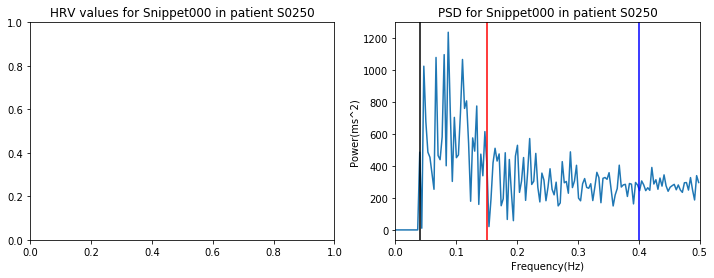

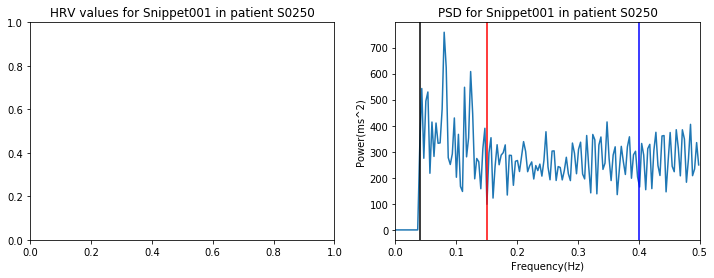

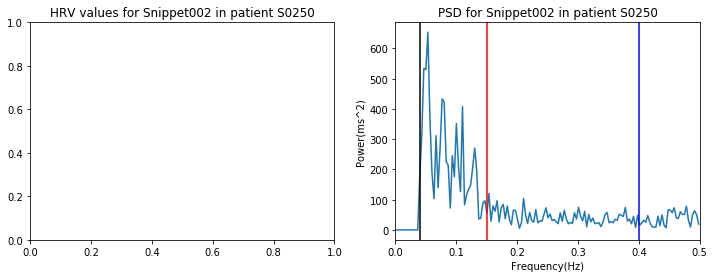

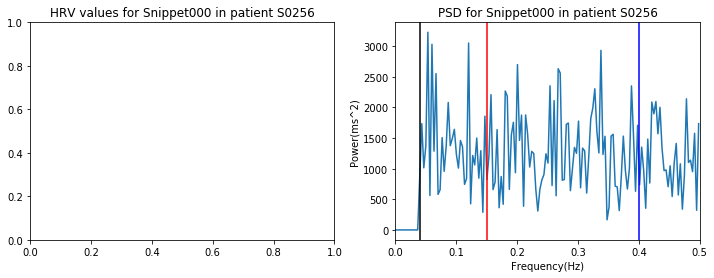

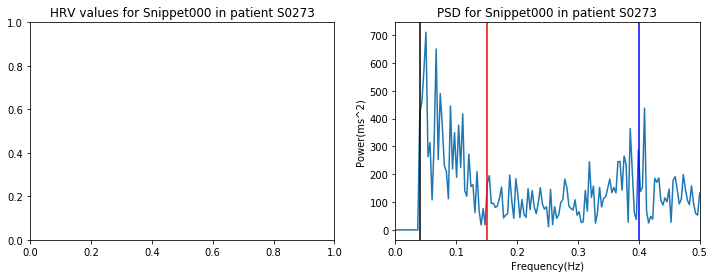

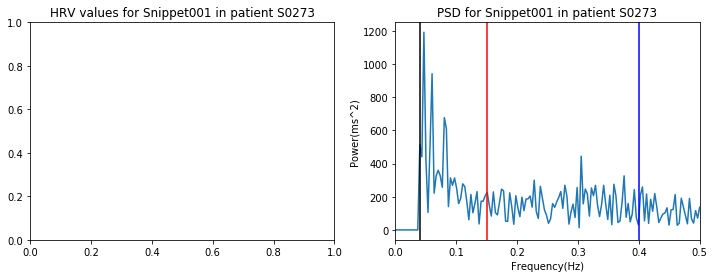

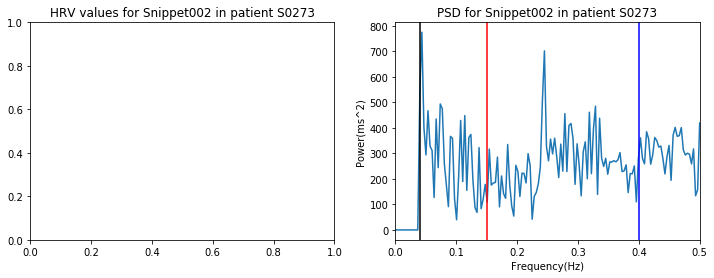

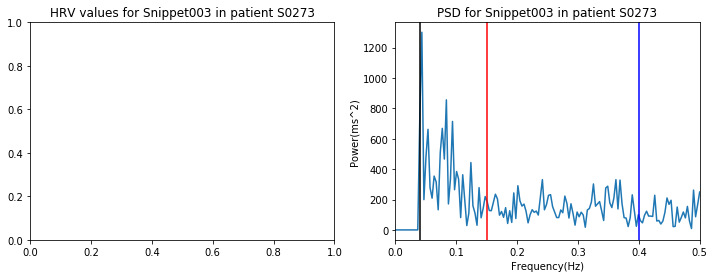

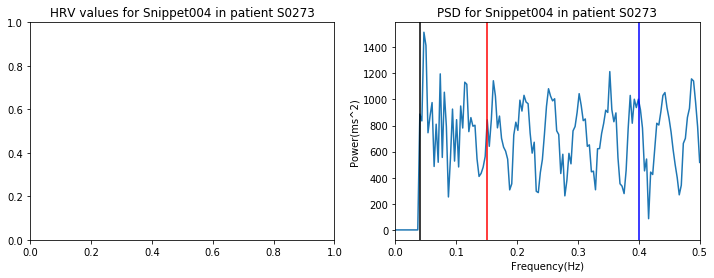

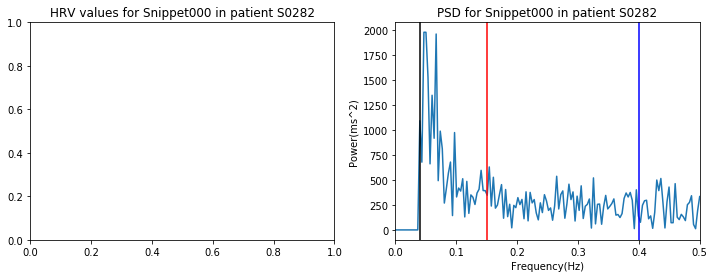

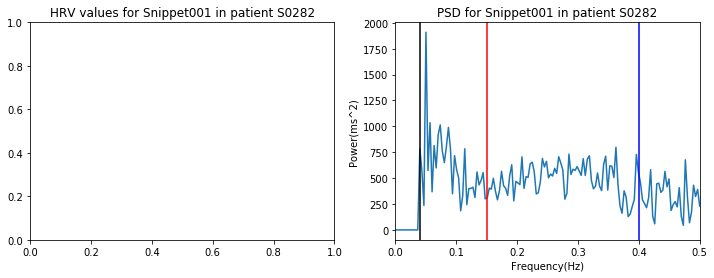

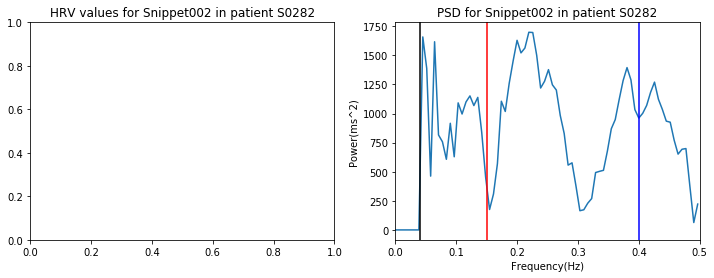

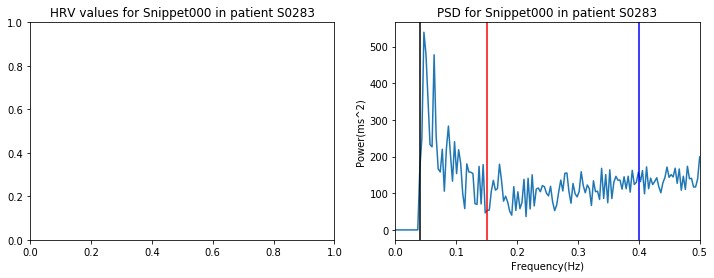

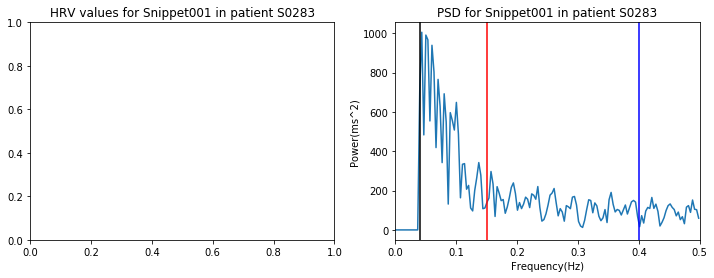

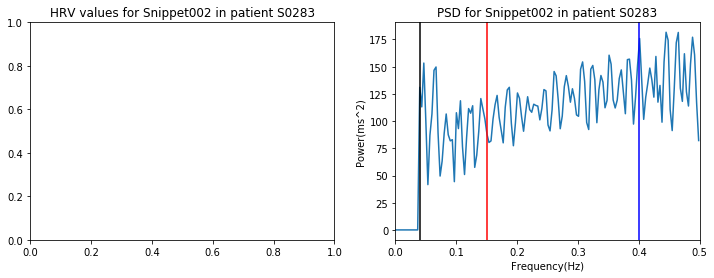

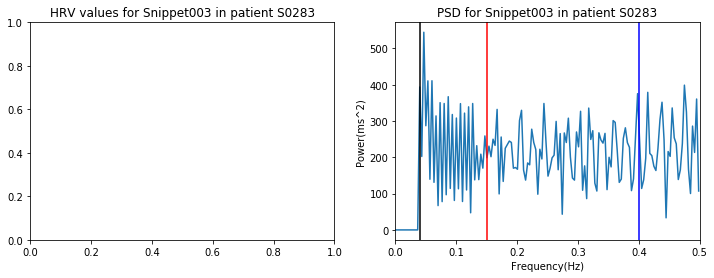

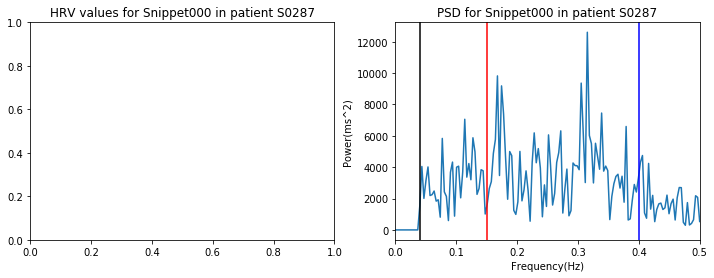

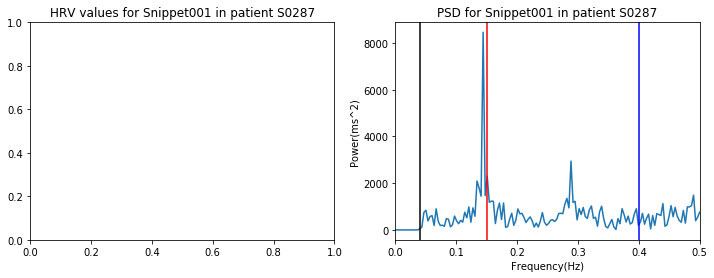

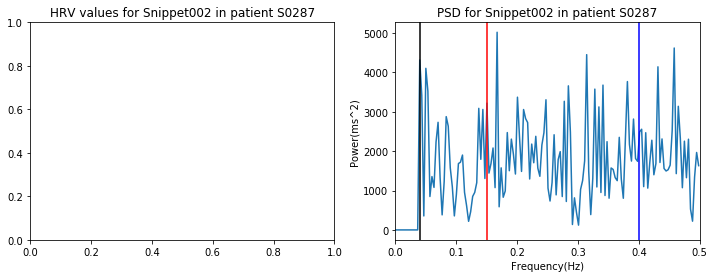

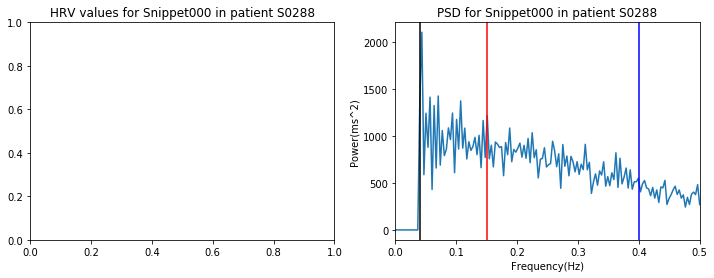

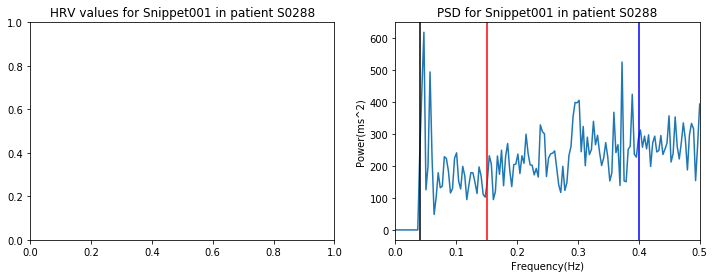

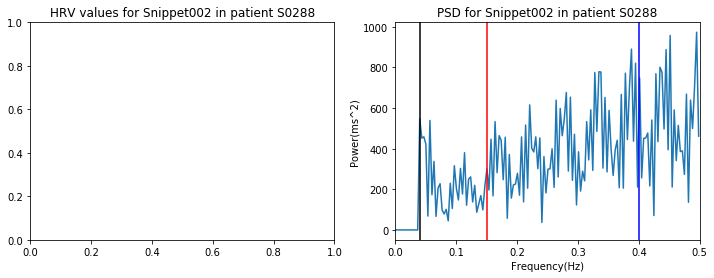

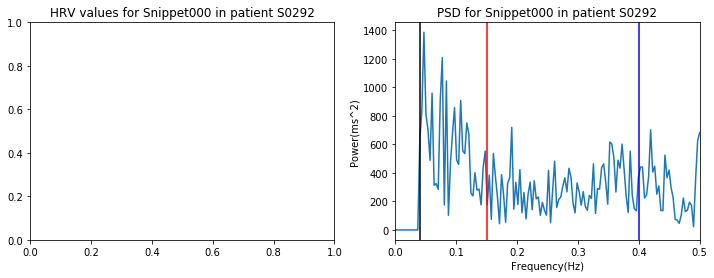

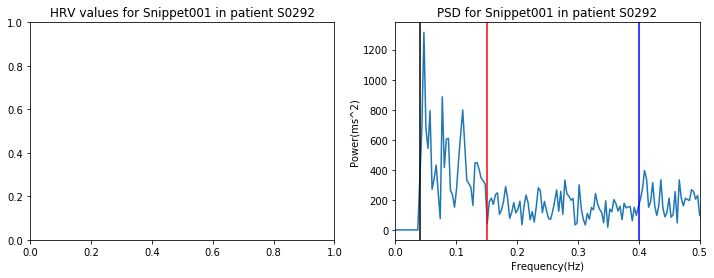

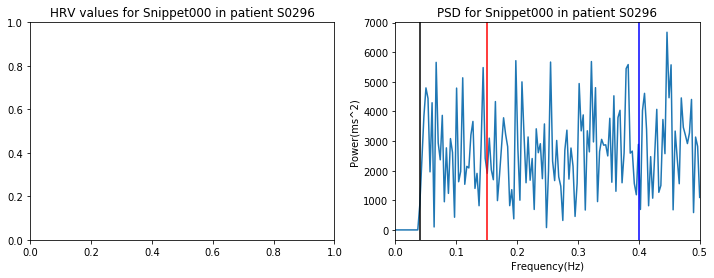

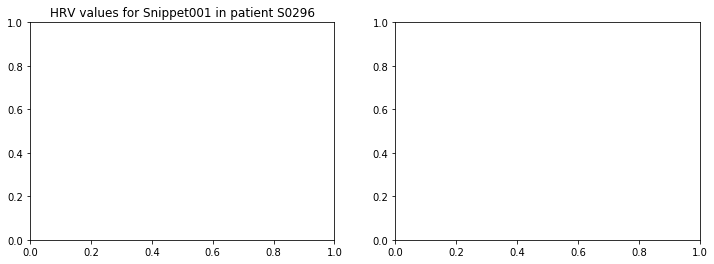

In [9]:
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        print("In snippet folder " + snip_folder)
                        
                        ### NOW IN CORRECT FOLDER ###
                        path_snip =path_folder + '/' + snip_folder
                        if _check_valid(path_snip):
                            para = _hrv_analysis(path_snip)
                            _save_parameters(para, path_snip)
                            print('\n\n')

## Initial Testing on Snippet sections selected by time-domain HRV values
### Specific Function definitions

In [10]:
def check_clean_valid(path):
    """Checks if the file is valid by checking the error flag in its metadata file"""
    return os.path.exists(path + '/CleanPeakMeta.json')

In [11]:
def clean_hrv_analysis(peaks):
    """Function takes a filepath, and extracts R-R interval values + HRV parameters in 
    frequency and time domains using functions from 4.0"""
    
    #df = pd.read_feather(peaks + '\\clean_snippet.ftr')
    df = pd.read_feather(peaks + '/clean_snippet.ftr')
    print(type(df))
    
    df_HRVt = RR_calculator(df)
    df_clean = _outlier_removal(df_HRVt)
    rr = df_clean['R-R Interval Final'].to_list()
    list_end = cos_correction(rr)
    df_clean['R-R Interval Final'] = list_end
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(df_HRVt['x_values']/1000,df_HRVt['R-R Interval Final'])
    plt.xlabel('time(s)')
    plt.ylabel('R-R Interval')
    plt.title('HRV values for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    
    plt.subplot(1,2,2)
    df_HRVf = _fft(resample(df_HRVt, 1), 1)
    plt.title('PSD for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    plt.show()
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.plot(df_clean['x_values']/1000,df_clean['R-R Interval Final'])
    plt.xlabel('time(s)')
    plt.ylabel('R-R Interval')
    plt.title('HRV values for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18] +':cos corrected')
    
    plt.subplot(1,2,2)
    df_HRVf = _fft(resample(df_clean, 1), 1)
    plt.title('PSD for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    plt.show()
    
    para = {}
    para['SDNN'] =  SDNN_calculator(df_HRVt) #Calculating the SDNN parameter
    para['RMSSD'] = RMSSD_calculator(df_HRVt) #Calculating the RMSSD parameter
    para['PNN50'] = PNN50_calculator(df_HRVt) #Calculating the PNN50 parameters

    para['LF'], para['HF'], para['LFHF'] = _LFHF(df_HRVf) #Calculating the frequency parameters
    return para

In [12]:
def clean_save_parameters(para, path):
    """Save parameters in new json file with snippets"""
    with open((path + '/CleanParameters.json'), "w") as outfile:
        json.dump(para, outfile)
        outfile.close()


  0%|                                                                                           | 0/56 [00:00<?, ?it/s]

In snippet folder Snippet000
In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


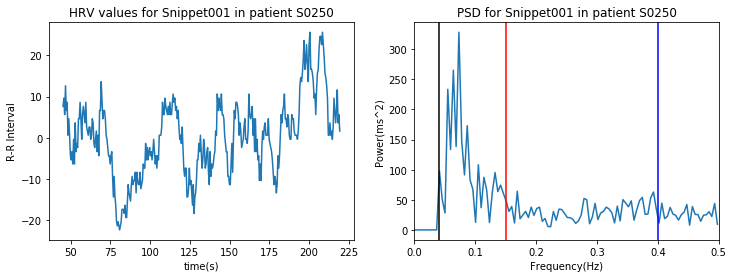

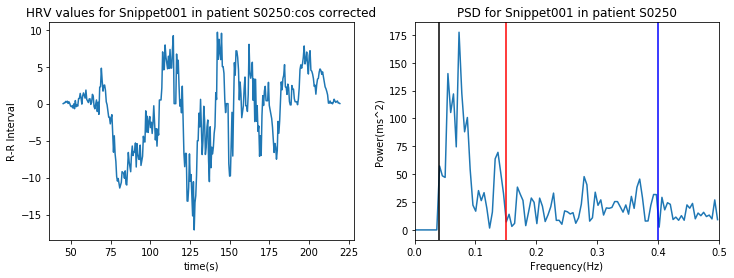


  4%|██▉                                                                                | 2/56 [00:02<01:19,  1.47s/it]

The SDNN is 9.388711176710585
The RMSSD is 3.7275644651843733
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 6.972244720053223
New formula being used
The absolute power of the High Frequency band is 5.05258479487378
The LF/HF is 1.3799362114866593



In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


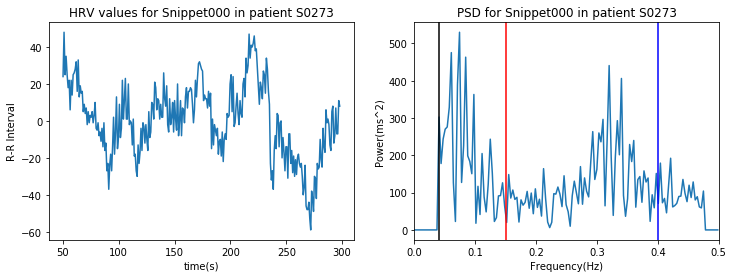

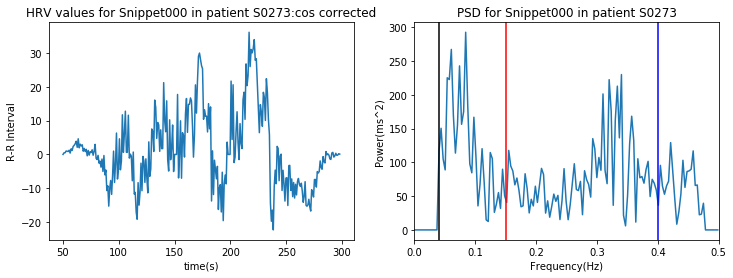

The SDNN is 19.93502977681763
The RMSSD is 11.883778830332387
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 13.341491259583139
New formula being used
The absolute power of the High Frequency band is 19.309388679624867
The LF/HF is 0.6909328659203483



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


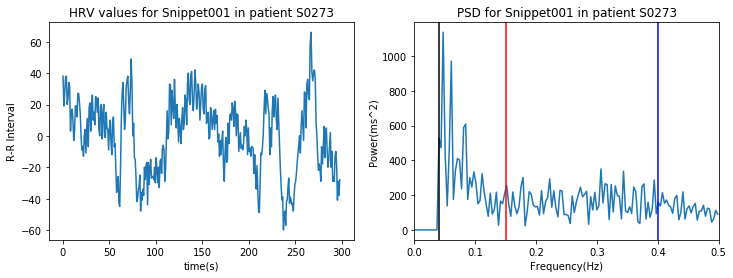

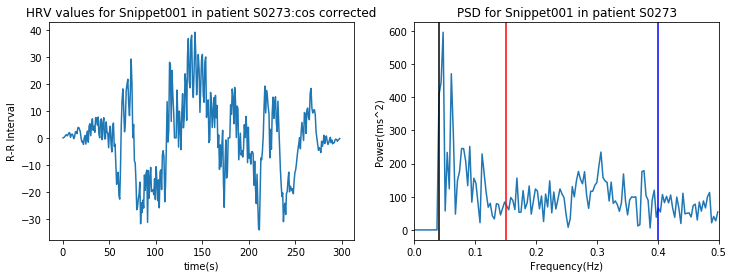

The SDNN is 23.382226136845293
The RMSSD is 13.006798668165926
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 19.026568875603836
New formula being used
The absolute power of the High Frequency band is 24.836171091050833
The LF/HF is 0.766083016816535



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


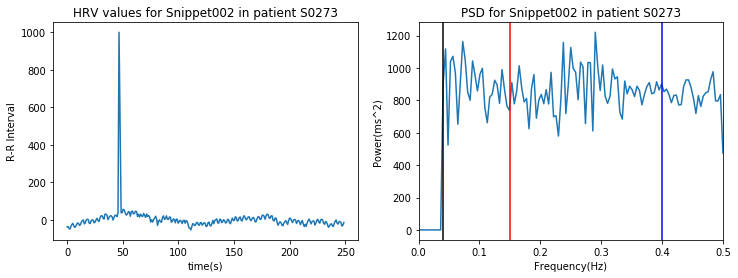

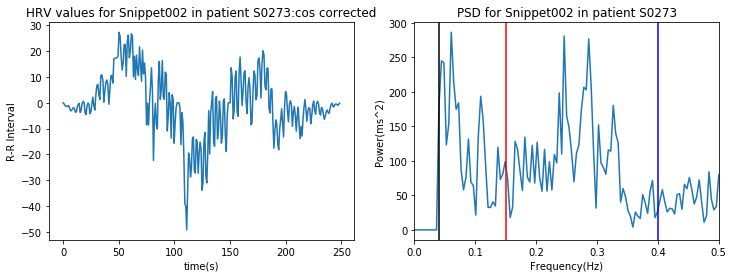


 11%|████████▉                                                                          | 6/56 [00:12<01:27,  1.74s/it]

The SDNN is 63.1055109941366
The RMSSD is 82.24981476252546
The PNN50 is 0.3546099290780142 %
The absolute power of the Low Frequency band is 13.725900026784808
New formula being used
The absolute power of the High Frequency band is 24.00461959671392
The LF/HF is 0.5718024387549052



In snippet folder Snippet003
In snippet folder Snippet004
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


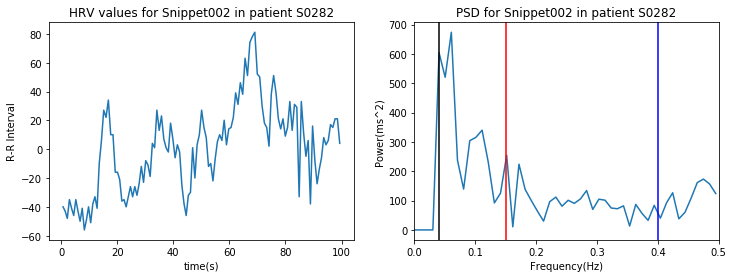

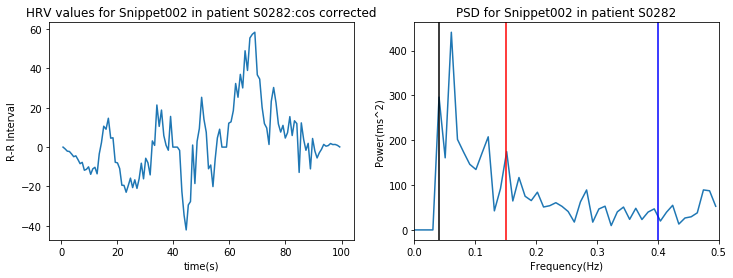


 12%|██████████▍                                                                        | 7/56 [00:14<01:23,  1.71s/it]

The SDNN is 30.02283210242785
The RMSSD is 17.00215194414246
The PNN50 is 1.6129032258064515 %
The absolute power of the Low Frequency band is 20.888081390275854
New formula being used
The absolute power of the High Frequency band is 14.231384287419836
The LF/HF is 1.467747688377747



In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


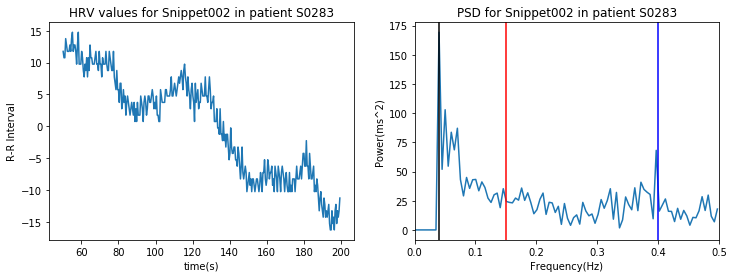

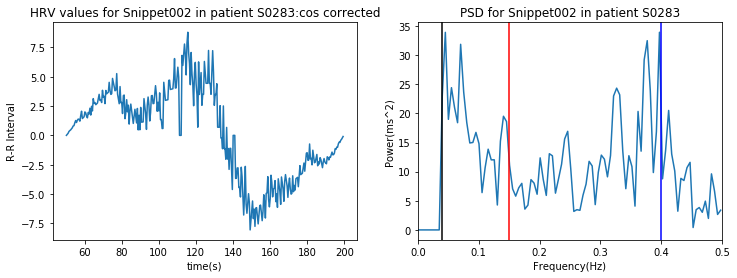


 14%|███████████▊                                                                       | 8/56 [00:16<01:35,  1.99s/it]

The SDNN is 8.048376197228723
The RMSSD is 1.8865766874508803
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 1.9487797689157489
New formula being used
The absolute power of the High Frequency band is 3.0071805189324077
The LF/HF is 0.6480421632977303



In snippet folder Snippet003
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


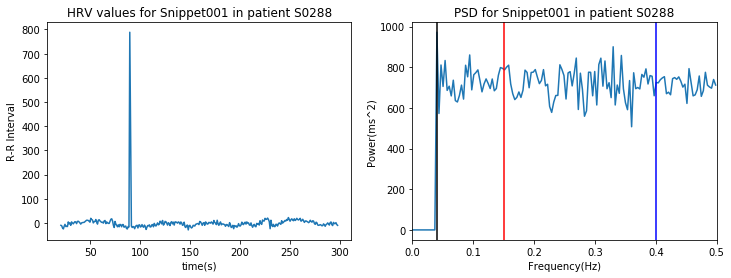

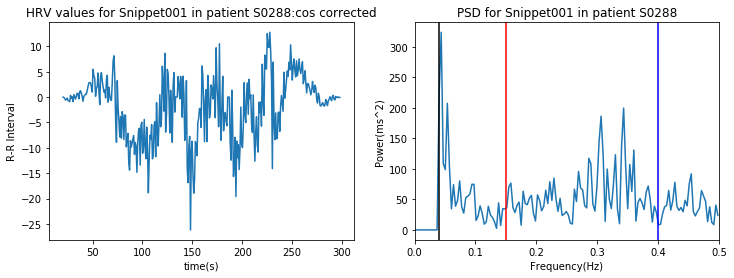


 18%|██████████████▋                                                                   | 10/56 [00:18<01:16,  1.65s/it]

The SDNN is 44.35105855955421
The RMSSD is 62.7406597860621
The PNN50 is 0.29940119760479045 %
The absolute power of the Low Frequency band is 6.989107548606402
New formula being used
The absolute power of the High Frequency band is 14.51482496850104
The LF/HF is 0.48151511050072093



In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


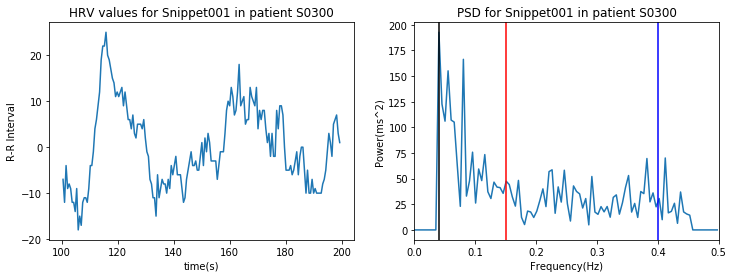

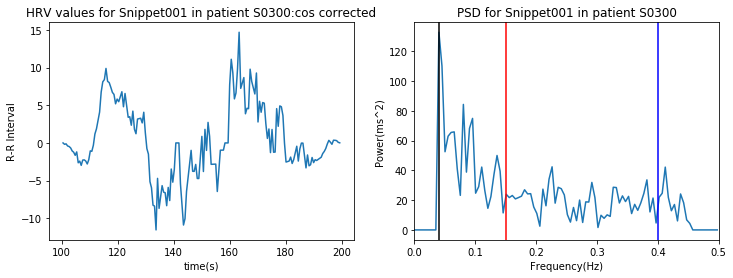


 23%|███████████████████                                                               | 13/56 [00:20<00:56,  1.32s/it]

The SDNN is 8.737276463521113
The RMSSD is 3.4300675107775387
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 5.611292342979991
New formula being used
The absolute power of the High Frequency band is 4.736355310060456
The LF/HF is 1.1847279132672095



In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet000
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


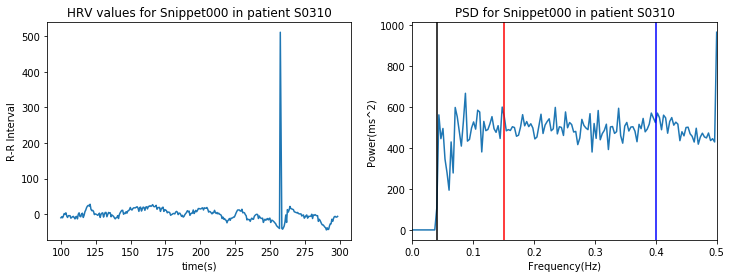

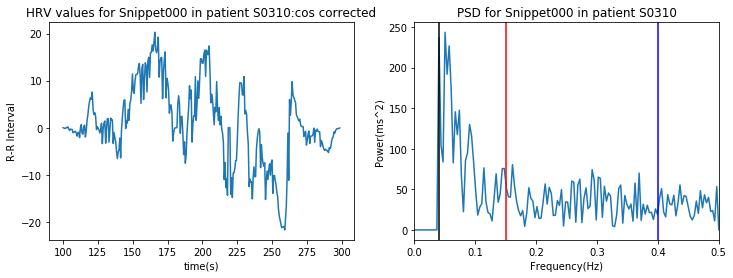


 30%|████████████████████████▉                                                         | 17/56 [00:22<00:42,  1.10s/it]

The SDNN is 31.674669436576426
The RMSSD is 43.212535945485534
The PNN50 is 0.30120481927710846 %
The absolute power of the Low Frequency band is 9.99971994049614
New formula being used
The absolute power of the High Frequency band is 8.54074558116555
The LF/HF is 1.170825175093377



In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
In snippet folder Snippet004
In snippet folder Snippet000
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet000
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


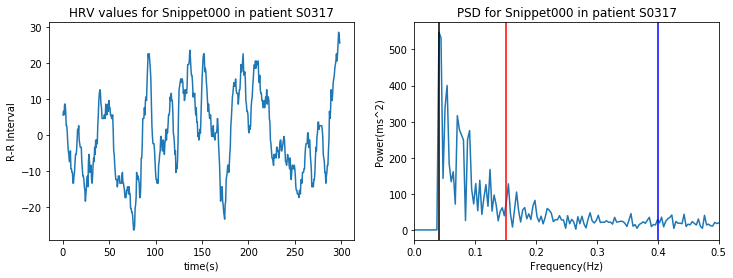

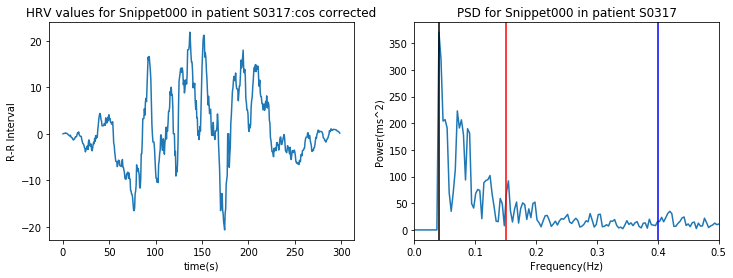

The SDNN is 11.532271169457752
The RMSSD is 2.453352684376911
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 12.79428650386978
New formula being used
The absolute power of the High Frequency band is 4.941023862160963
The LF/HF is 2.5893998614032565



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


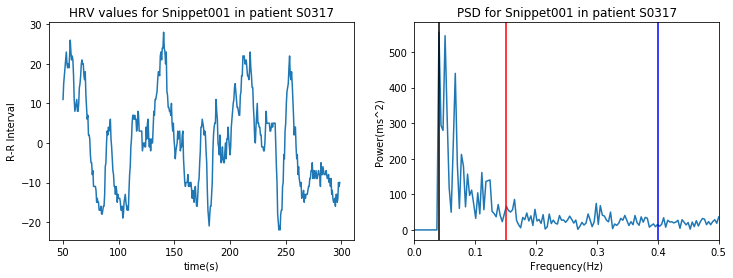

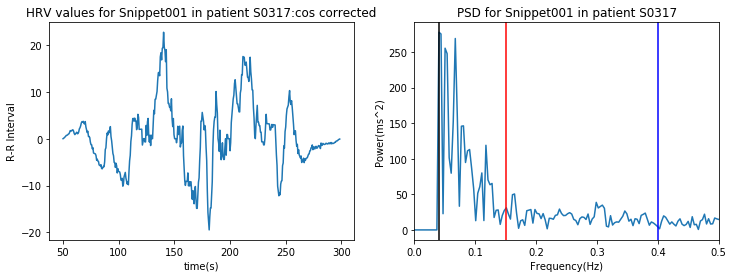


 39%|████████████████████████████████▏                                                 | 22/56 [00:27<00:36,  1.07s/it]

The SDNN is 11.628979019021253
The RMSSD is 2.65742857016037
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 11.046268972385839
New formula being used
The absolute power of the High Frequency band is 4.6285310431274205
The LF/HF is 2.386560416136274



In snippet folder Snippet002
In snippet folder Snippet003
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


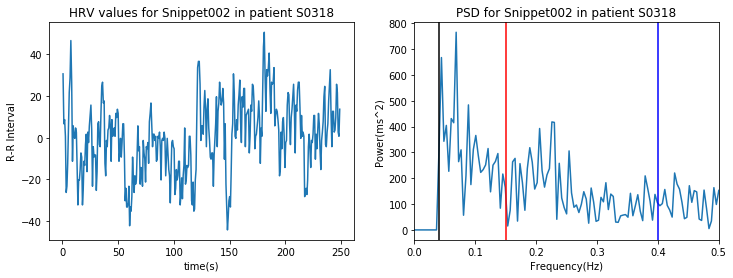

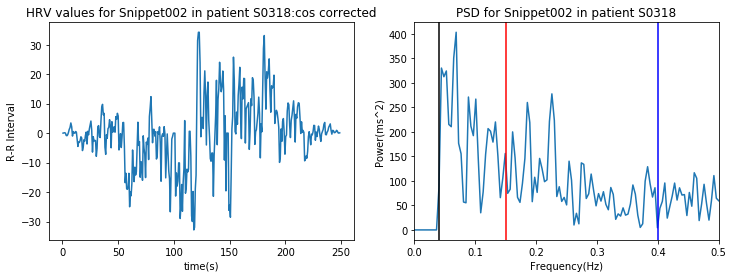


 41%|█████████████████████████████████▋                                                | 23/56 [00:29<00:42,  1.30s/it]

The SDNN is 17.353493026857482
The RMSSD is 12.088972596005267
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 21.447789047782887
New formula being used
The absolute power of the High Frequency band is 22.024232541626596
The LF/HF is 0.9738268521841018



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


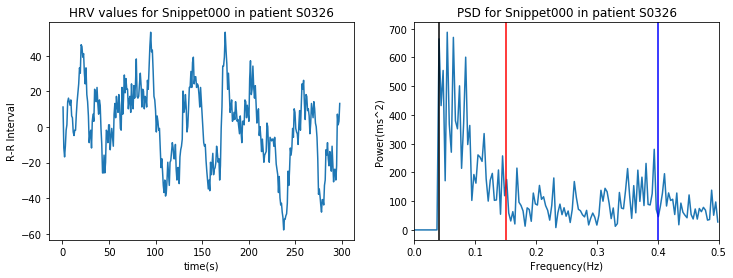

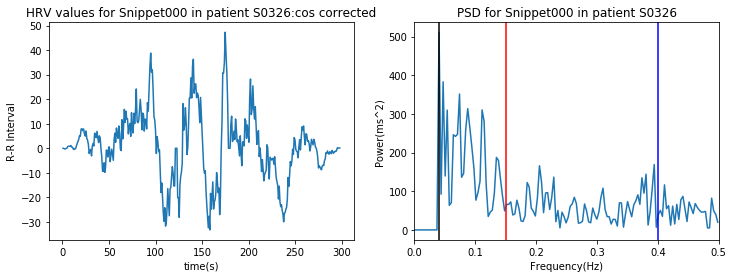


 43%|███████████████████████████████████▏                                              | 24/56 [00:31<00:47,  1.49s/it]

The SDNN is 21.730151167534906
The RMSSD is 8.931980837985538
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 20.27808756675972
New formula being used
The absolute power of the High Frequency band is 14.761391045301407
The LF/HF is 1.3737247055191517



In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet000
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


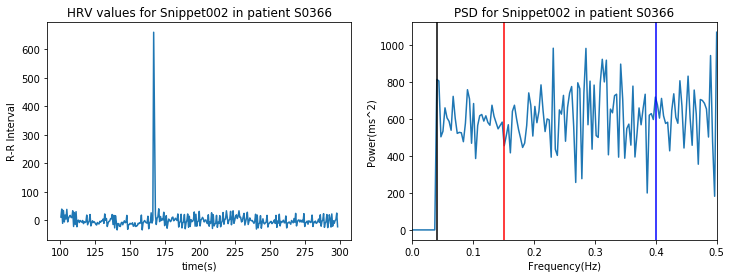

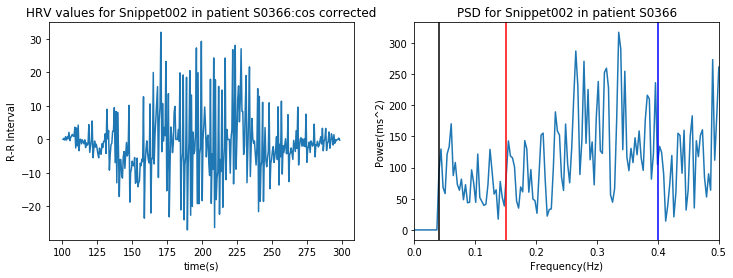


 55%|█████████████████████████████████████████████▍                                    | 31/56 [00:33<00:28,  1.14s/it]

The SDNN is 39.00482090802957
The RMSSD is 55.15865854007237
The PNN50 is 0.2976190476190476 %
The absolute power of the Low Frequency band is 8.453702497903146
New formula being used
The absolute power of the High Frequency band is 33.68820677944441
The LF/HF is 0.2509395217516106



In snippet folder Snippet003
In snippet folder Snippet000
In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


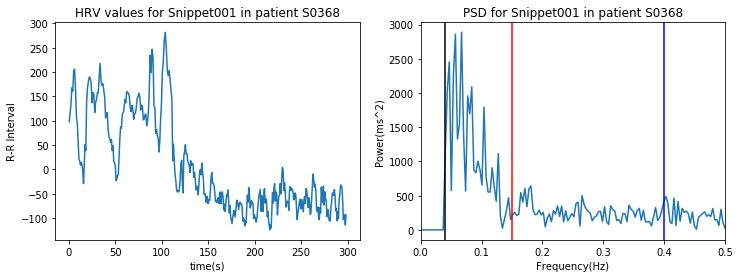

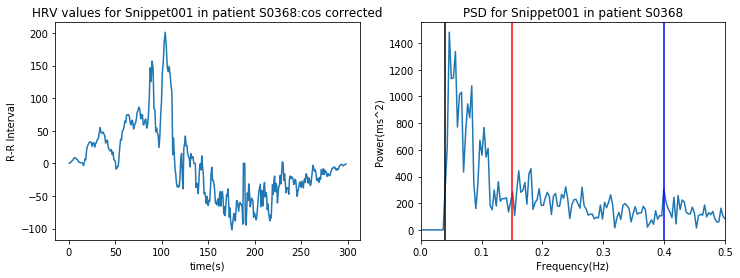


 57%|██████████████████████████████████████████████▊                                   | 32/56 [00:35<00:34,  1.43s/it]

The SDNN is 95.18739956131294
The RMSSD is 23.223453755800968
The PNN50 is 1.3550135501355014 %
The absolute power of the Low Frequency band is 64.85455952041438
New formula being used
The absolute power of the High Frequency band is 46.647248018711885
The LF/HF is 1.3903190922302404



In snippet folder Snippet002
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


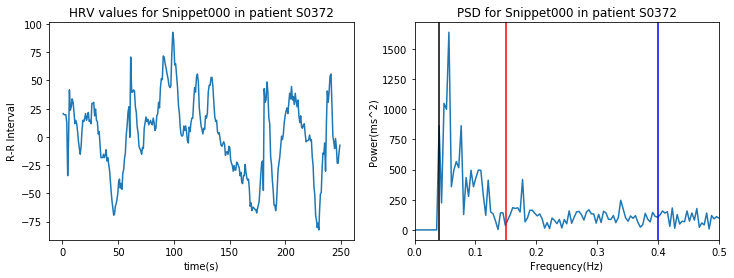

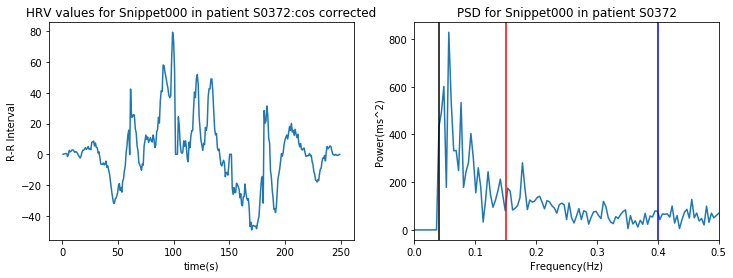


 59%|████████████████████████████████████████████████▎                                 | 33/56 [00:37<00:36,  1.60s/it]

The SDNN is 34.44213214880959
The RMSSD is 12.232309388306282
The PNN50 is 0.6369426751592357 %
The absolute power of the Low Frequency band is 31.81360220854278
New formula being used
The absolute power of the High Frequency band is 20.59657984193521
The LF/HF is 1.5446060682254341



In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


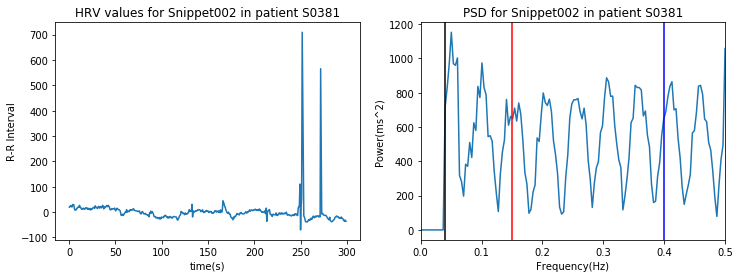

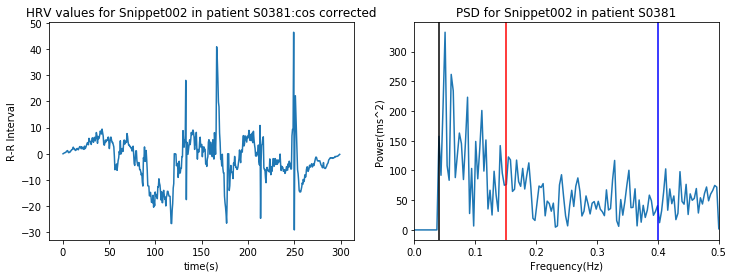


 61%|█████████████████████████████████████████████████▊                                | 34/56 [00:39<00:38,  1.77s/it]

The SDNN is 43.8737033199043
The RMSSD is 57.919661084039056
The PNN50 is 0.7920792079207921 %
The absolute power of the Low Frequency band is 13.570441344916334
New formula being used
The absolute power of the High Frequency band is 13.1868944957325
The LF/HF is 1.0290854567243226



In snippet folder Snippet000
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


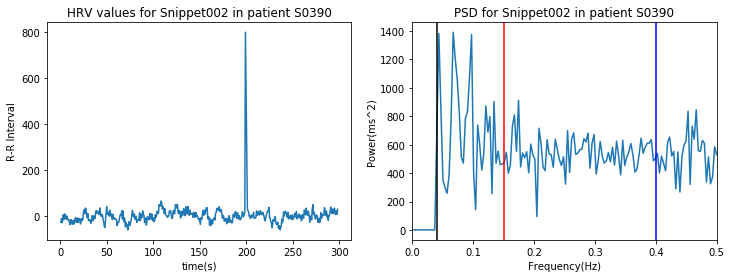

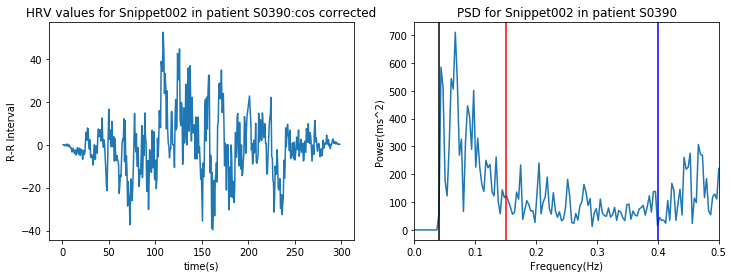


 64%|████████████████████████████████████████████████████▋                             | 36/56 [00:42<00:32,  1.63s/it]

The SDNN is 43.18540285327933
The RMSSD is 54.32710881646028
The PNN50 is 0.22075055187637968 %
The absolute power of the Low Frequency band is 31.555378978866063
New formula being used
The absolute power of the High Frequency band is 20.68561108919948
The LF/HF is 1.5254748260901987



In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


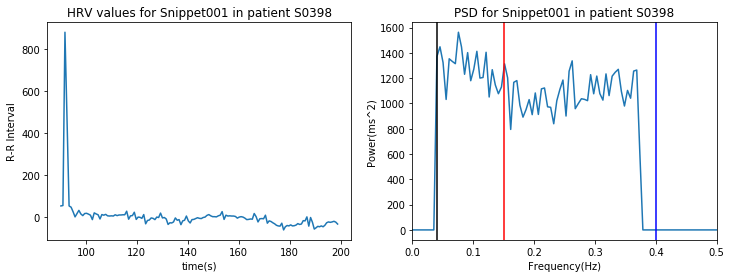

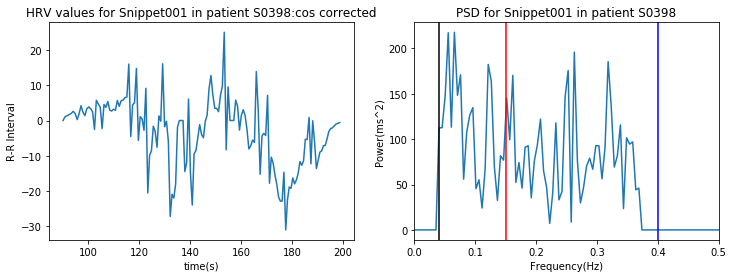


 68%|███████████████████████████████████████████████████████▋                          | 38/56 [00:43<00:24,  1.35s/it]

The SDNN is 75.92137839626913
The RMSSD is 97.26798663738136
The PNN50 is 0.6756756756756757 %
The absolute power of the Low Frequency band is 12.43927393488743
New formula being used
The absolute power of the High Frequency band is 18.559865156119887
The LF/HF is 0.6702243701800674



In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
In snippet folder Snippet004
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


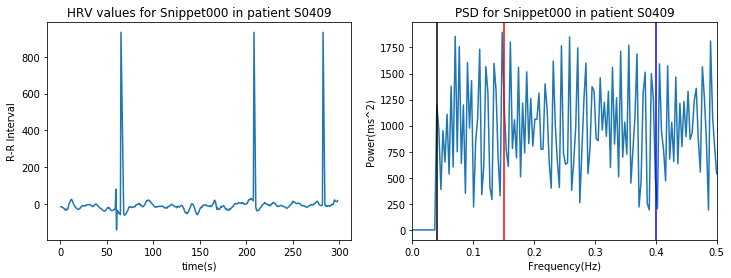

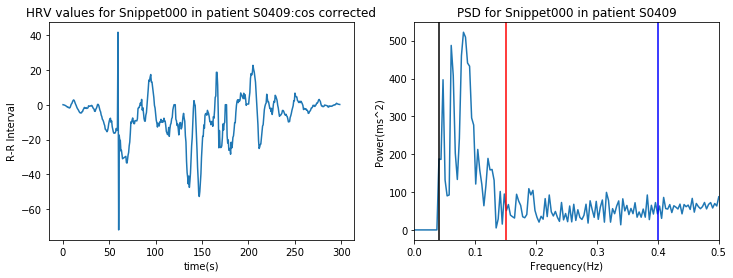


 75%|█████████████████████████████████████████████████████████████▌                    | 42/56 [00:45<00:15,  1.10s/it]

The SDNN is 78.20604709505702
The RMSSD is 109.90069706659307
The PNN50 is 1.0917030567685588 %
The absolute power of the Low Frequency band is 24.067091744515658
New formula being used
The absolute power of the High Frequency band is 12.92790807479873
The LF/HF is 1.8616385269192401



In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


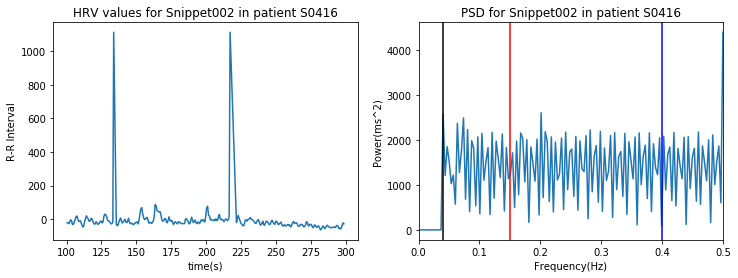

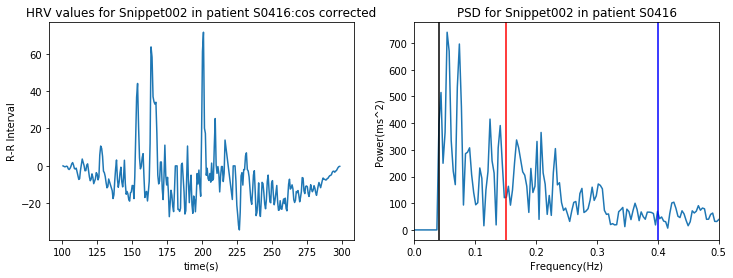


 79%|████████████████████████████████████████████████████████████████▍                 | 44/56 [00:47<00:12,  1.07s/it]

The SDNN is 93.41085042015386
The RMSSD is 128.73783098410806
The PNN50 is 0.967741935483871 %
The absolute power of the Low Frequency band is 32.39456597716425
New formula being used
The absolute power of the High Frequency band is 29.46026457340305
The LF/HF is 1.0996020044711448



In snippet folder Snippet003
In snippet folder Snippet004
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


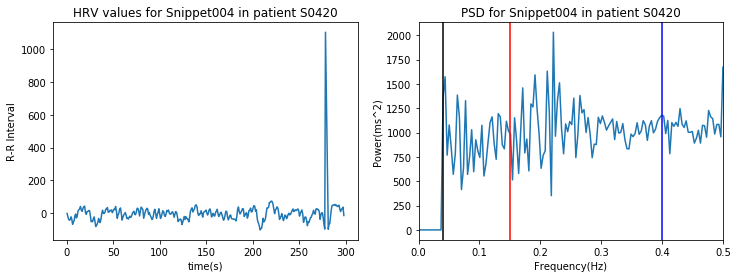

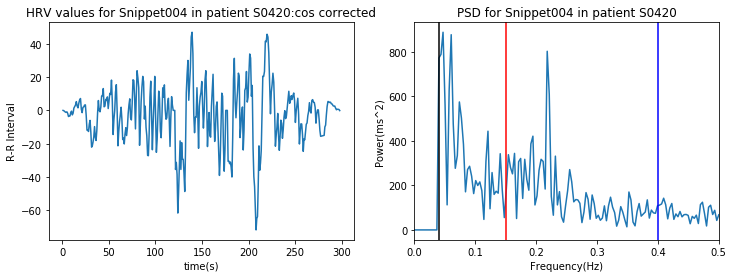


 80%|█████████████████████████████████████████████████████████████████▉                | 45/56 [00:49<00:14,  1.33s/it]

The SDNN is 67.58779827009073
The RMSSD is 93.54798896317773
The PNN50 is 0.2898550724637681 %
The absolute power of the Low Frequency band is 38.04774149548582
New formula being used
The absolute power of the High Frequency band is 39.82002485311163
The LF/HF is 0.955492660686089



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


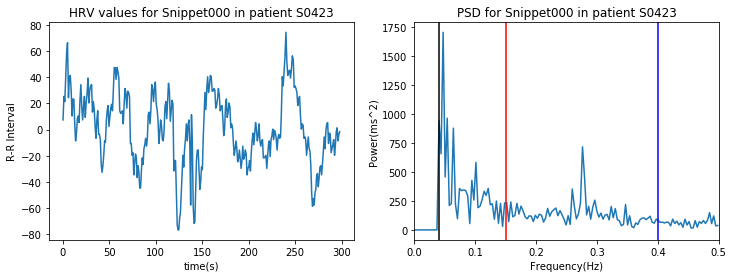

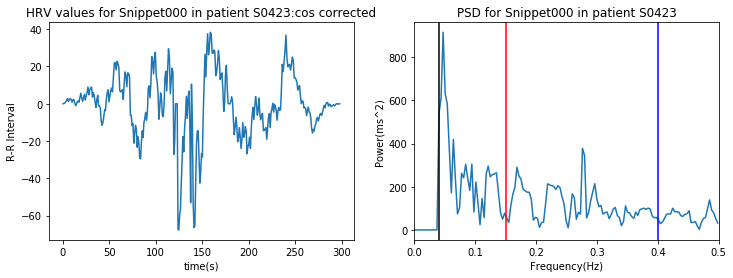

The SDNN is 27.307740649204145
The RMSSD is 12.435114614337019
The PNN50 is 0.3134796238244514 %
The absolute power of the Low Frequency band is 29.708832111371166
New formula being used
The absolute power of the High Frequency band is 29.280031381856507
The LF/HF is 1.0146448179621954



In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


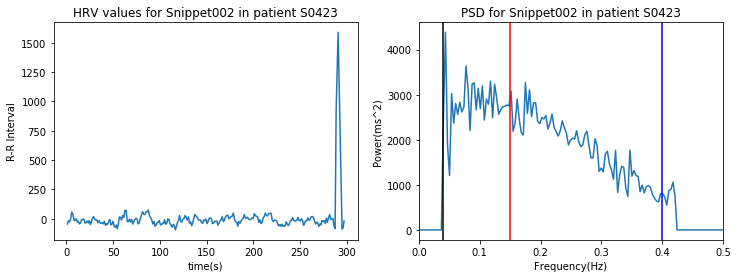

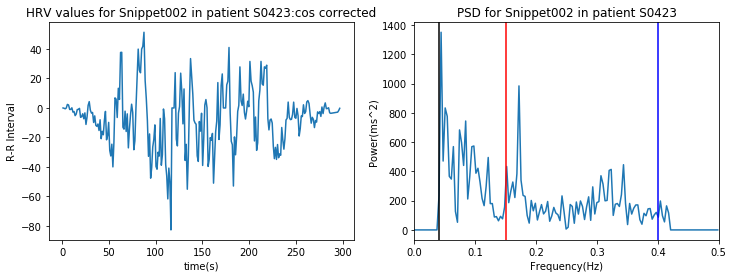

The SDNN is 121.1257709294145
The RMSSD is 133.22161128155173
The PNN50 is 2.3904382470119523 %
The absolute power of the Low Frequency band is 42.24820830605665
New formula being used
The absolute power of the High Frequency band is 45.37848095396613
The LF/HF is 0.9310185669043226



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


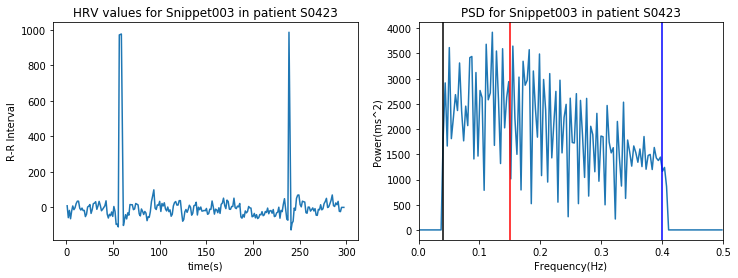

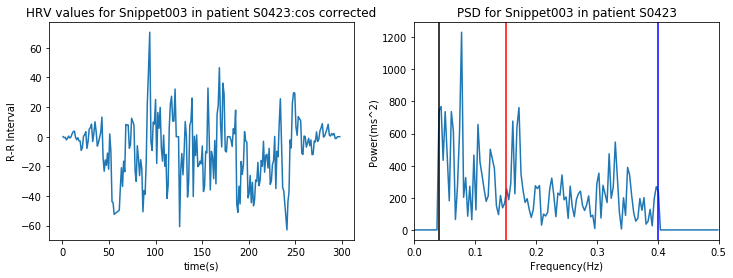

The SDNN is 114.81277882749544
The RMSSD is 142.7805239109969
The PNN50 is 3.3057851239669422 %
The absolute power of the Low Frequency band is 42.22852024610721
New formula being used
The absolute power of the High Frequency band is 52.44740878136921
The LF/HF is 0.8051593248798968



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


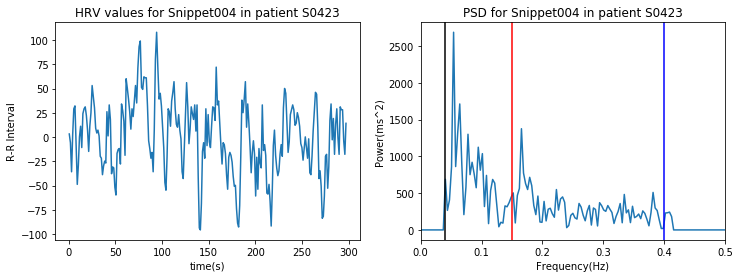

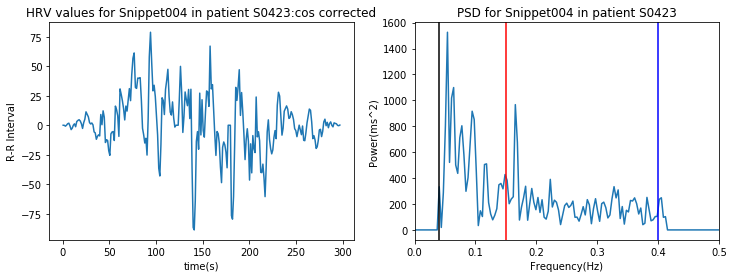


 82%|███████████████████████████████████████████████████████████████████▎              | 46/56 [00:57<00:33,  3.39s/it]

The SDNN is 37.06227191447537
The RMSSD is 26.286252646379637
The PNN50 is 3.6885245901639343 %
The absolute power of the Low Frequency band is 52.94330153068229
New formula being used
The absolute power of the High Frequency band is 47.69825919665841
The LF/HF is 1.1099629718644182



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


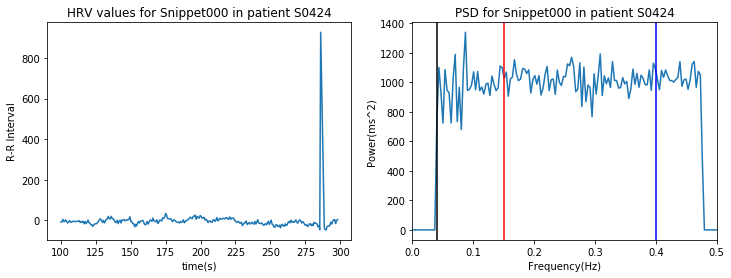

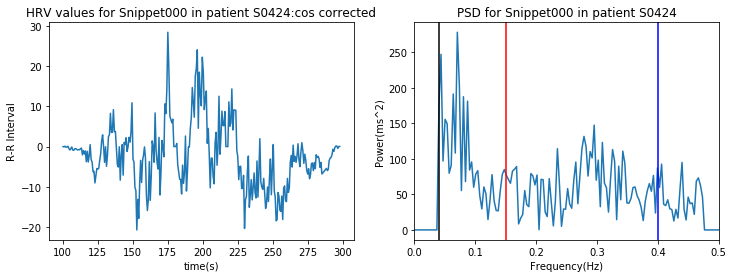


 84%|████████████████████████████████████████████████████████████████████▊             | 47/56 [01:00<00:28,  3.17s/it]

The SDNN is 56.88662089527274
The RMSSD is 81.94437224418324
The PNN50 is 0.35211267605633806 %
The absolute power of the Low Frequency band is 11.101008243962779
New formula being used
The absolute power of the High Frequency band is 15.480341037300931
The LF/HF is 0.7171035972149545



In snippet folder Snippet001
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


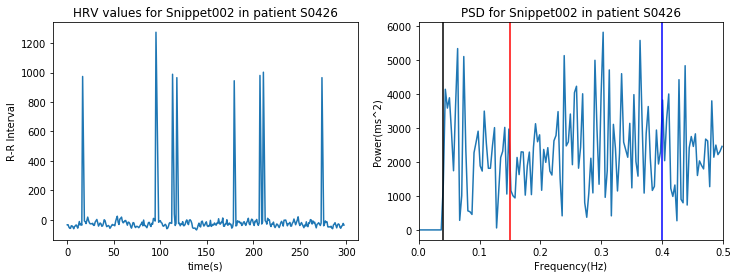

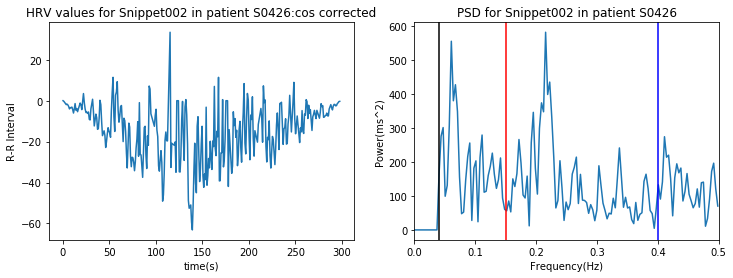

The SDNN is 162.05356407153326
The RMSSD is 229.53130385297138
The PNN50 is 2.4390243902439024 %
The absolute power of the Low Frequency band is 21.558183268211007
New formula being used
The absolute power of the High Frequency band is 33.17224577998244
The LF/HF is 0.6498861551671048



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


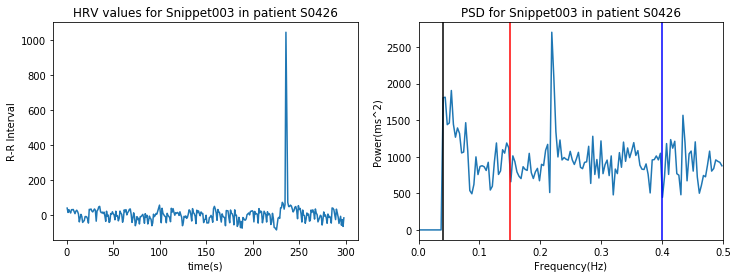

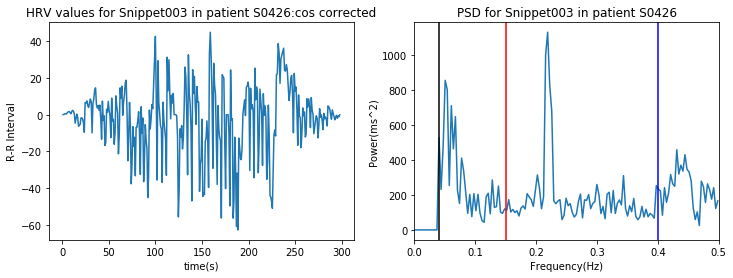

The SDNN is 65.28387525152615
The RMSSD is 82.80231210378616
The PNN50 is 8.256880733944955 %
The absolute power of the Low Frequency band is 30.402966045627295
New formula being used
The absolute power of the High Frequency band is 46.05449691189094
The LF/HF is 0.6601519522359056



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


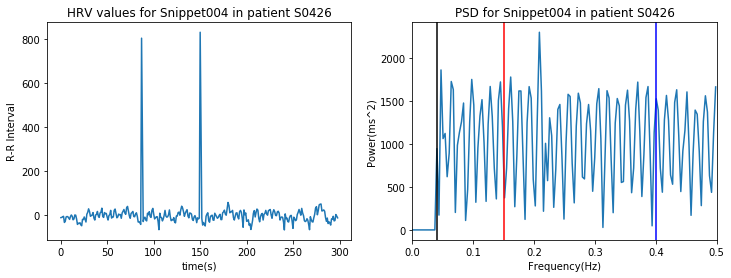

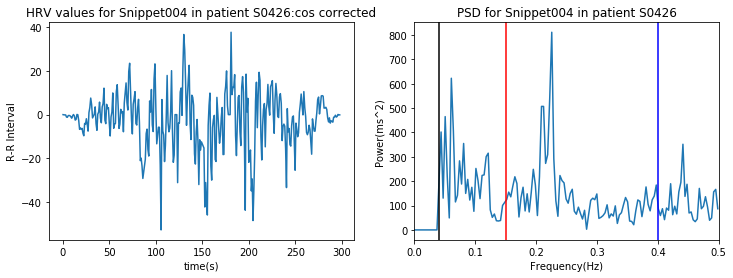


 86%|██████████████████████████████████████████████████████████████████████▎           | 48/56 [01:06<00:31,  3.95s/it]

The SDNN is 68.92870811730833
The RMSSD is 97.21640120072529
The PNN50 is 2.2222222222222223 %
The absolute power of the Low Frequency band is 21.817404883492802
New formula being used
The absolute power of the High Frequency band is 35.74286774543836
The LF/HF is 0.6103988364581413



In snippet folder Snippet000
In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


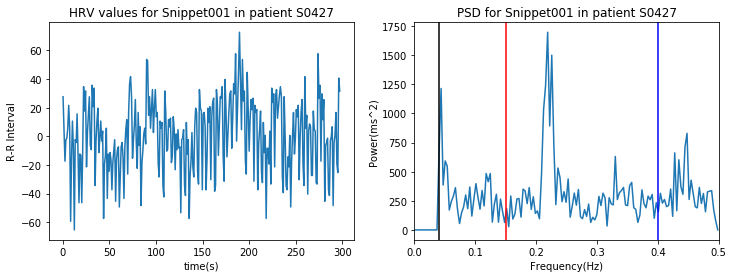

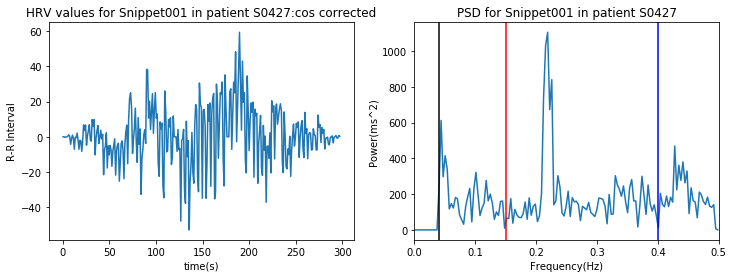

The SDNN is 25.239195613835783
The RMSSD is 31.14668587435317
The PNN50 is 5.442176870748299 %
The absolute power of the Low Frequency band is 19.76626970194991
New formula being used
The absolute power of the High Frequency band is 47.46720042194582
The LF/HF is 0.4164195386760421



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


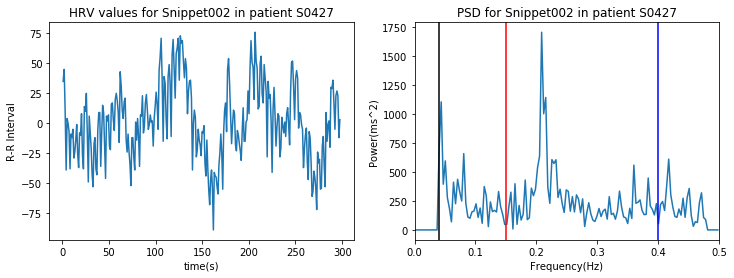

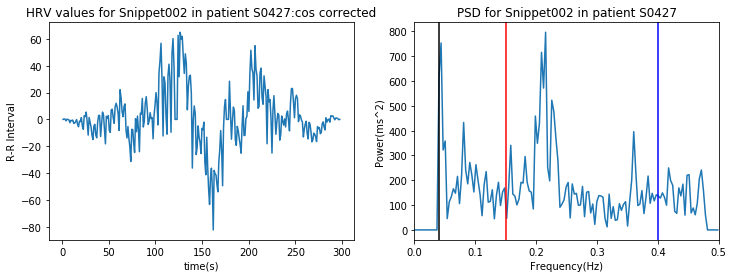

The SDNN is 31.287439327134503
The RMSSD is 24.413111231467404
The PNN50 is 4.2105263157894735 %
The absolute power of the Low Frequency band is 23.473508022938212
New formula being used
The absolute power of the High Frequency band is 45.42259591414383
The LF/HF is 0.5167804162339599



In snippet folder Snippet003
In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


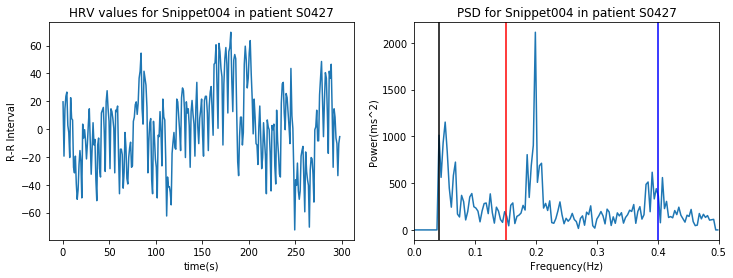

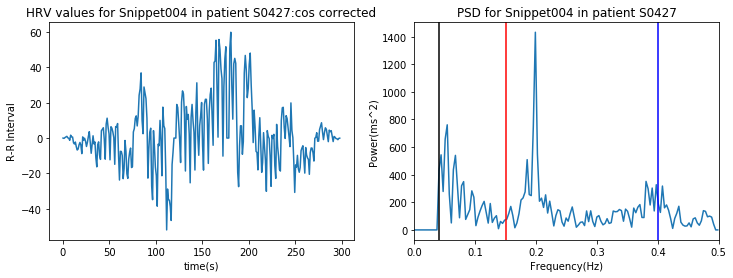


 88%|███████████████████████████████████████████████████████████████████████▊          | 49/56 [01:12<00:32,  4.66s/it]

The SDNN is 28.237802346237082
The RMSSD is 23.554149214214455
The PNN50 is 3.4129692832764507 %
The absolute power of the Low Frequency band is 24.638612267856946
New formula being used
The absolute power of the High Frequency band is 40.90001513548918
The LF/HF is 0.6024108349651411



In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


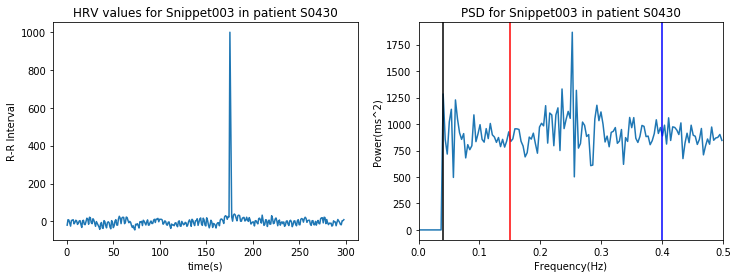

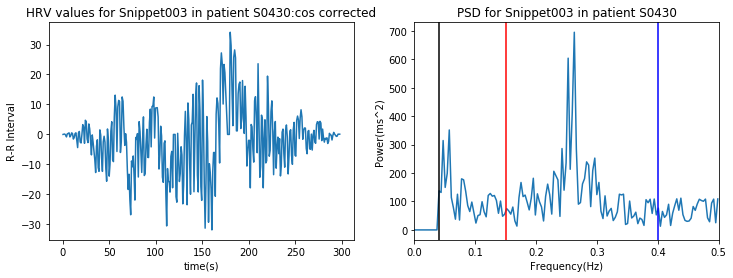


 89%|█████████████████████████████████████████████████████████████████████████▏        | 50/56 [01:13<00:21,  3.65s/it]

The SDNN is 58.01693667846641
The RMSSD is 78.82147895828484
The PNN50 is 0.3105590062111801 %
The absolute power of the Low Frequency band is 12.354673004681915
New formula being used
The absolute power of the High Frequency band is 31.48444507963343
The LF/HF is 0.3924056140558714



In snippet folder Snippet004
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
In snippet folder Snippet004
In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
In snippet folder Snippet004
In snippet folder Snippet000
In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


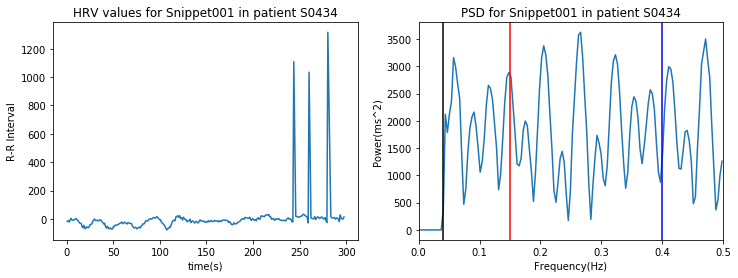

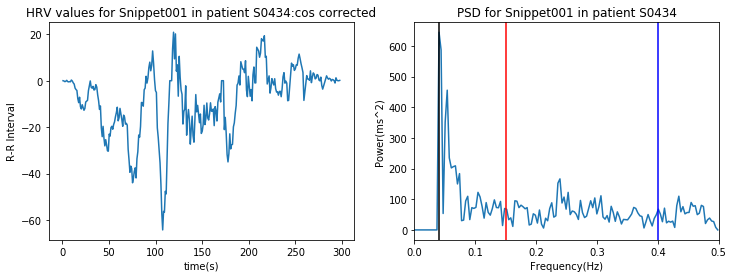


 95%|█████████████████████████████████████████████████████████████████████████████▌    | 53/56 [01:16<00:08,  2.77s/it]

The SDNN is 119.86101948389496
The RMSSD is 166.1012995522953
The PNN50 is 1.0101010101010102 %
The absolute power of the Low Frequency band is 16.23425145210001
New formula being used
The absolute power of the High Frequency band is 14.070138590005044
The LF/HF is 1.1538089229364294



In snippet folder Snippet002
In snippet folder Snippet003
In snippet folder Snippet004
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


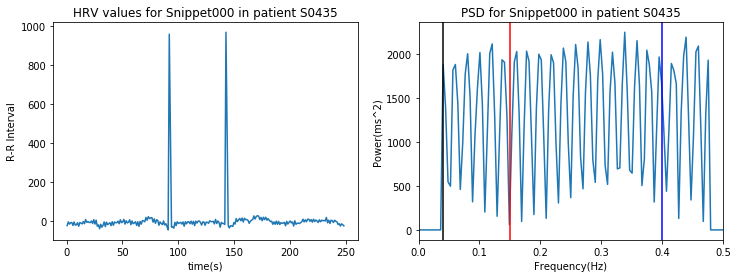

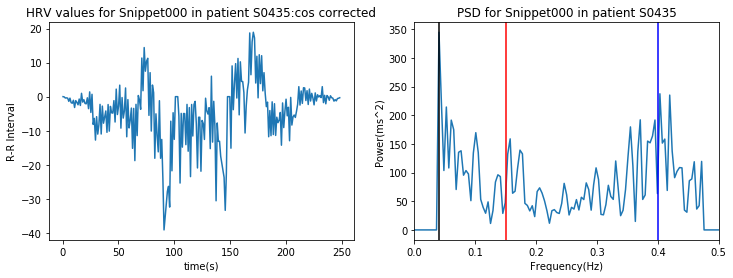

The SDNN is 89.79590603724279
The RMSSD is 130.3078980917302
The PNN50 is 0.8438818565400843 %
The absolute power of the Low Frequency band is 12.301536545066678
New formula being used
The absolute power of the High Frequency band is 18.45125764737972
The LF/HF is 0.666704502216608



In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


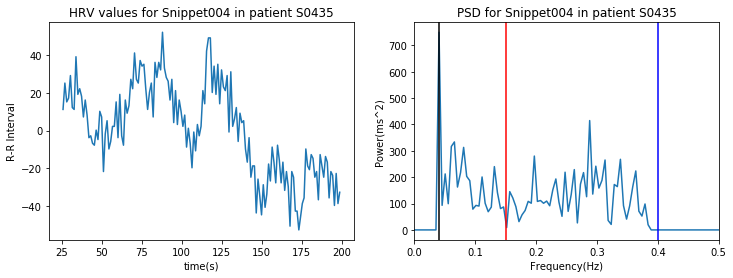

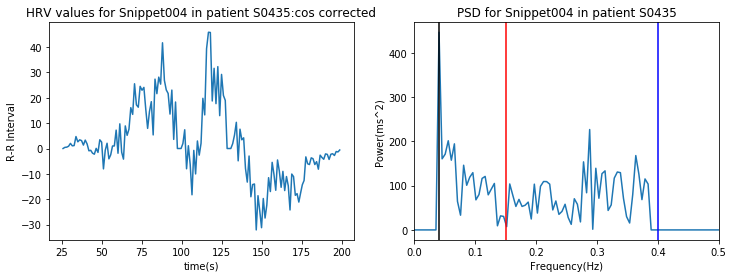


 96%|███████████████████████████████████████████████████████████████████████████████   | 54/56 [01:19<00:05,  2.95s/it]

The SDNN is 24.130380824573542
The RMSSD is 13.961412988361134
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 13.420500644565454
New formula being used
The absolute power of the High Frequency band is 18.65664409620196
The LF/HF is 0.7193416230359212



In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


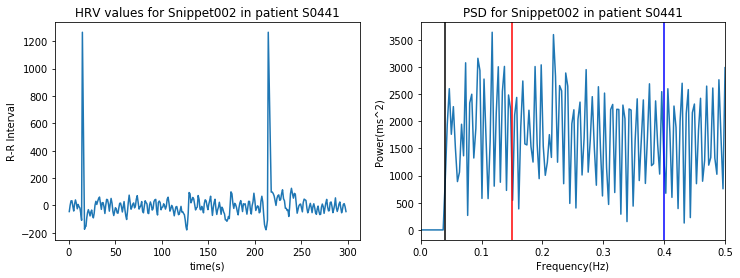

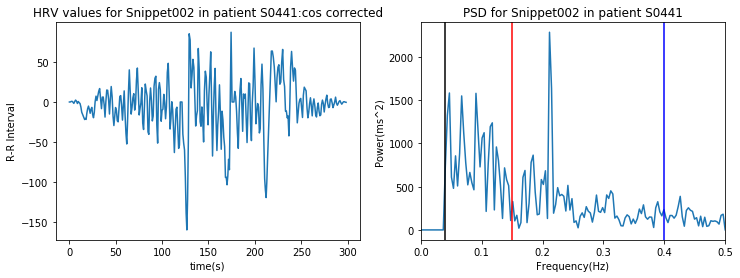


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [01:21<00:00,  1.45s/it]

The SDNN is 114.16276678729977
The RMSSD is 156.71468071497415
The PNN50 is 10.191082802547772 %
The absolute power of the Low Frequency band is 88.0992095423884
New formula being used
The absolute power of the High Frequency band is 76.07299576356486
The LF/HF is 1.1580878162889896



In snippet folder Snippet003
In snippet folder Snippet004


In [13]:
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        print("In snippet folder " + snip_folder)
                        
                        ### NOW IN CORRECT FOLDER ###
                        path_snip =path_folder + '/' + snip_folder
                        if check_clean_valid(path_snip):
                            para = clean_hrv_analysis(path_snip)
                            clean_save_parameters(para, path_snip)
                            print('\n\n')